# Study of data reuse: Stimulation of the ventral tegmental area in macaques drives category-selective learning in the absence of attention (v1)

In this notebook we will look more closely at the EBRAINS dataset "[Stimulation of the ventral tegmental area in macaques drives category-selective learning in the absence of attention (v1)](https://search.kg.ebrains.eu/?category=Dataset&modality[0]=electrophysiology&dataAccessibility[0]=free%20access&species[0]=Macaca%20mulatta#87a63af5-06ac-4fec-89e0-b7f1a9d6c192)", contributed by Wim Vanduffel from the University of California, Riverside, USA.

As we can see from the dataset description,

<i>Here, we show that pairing sublaminal complex visual stimuli (faces and bodies) with electrical microstimulation of the ventral tegmental area (VTA-EM) causes category-selective task-irrelevant VPL.</i>

his dataset forms part of the results reported in Murris, S. R., Arsenault, J. T., Raman, R., Vogels, R., & Vanduffel, W. (2021). Electrical stimulation of the macaque ventral tegmental area drives category-selective learning without attention. *Neuron*, **109**(8), 1381–1395.e7. https://doi.org/10.1016/j.neuron.2021.02.013

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 


### Notes: 
All the data is very well organized with the codes available to reproduce the figures, either in .py, .m or .R


In [1]:
#prepare the notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)


/home/isaurebotherel/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#visualisation of data

df=pd.read_csv("hbp-d000058_VTAinducedVPLandPlasticity_pub-v1.0-data_storage - behavior/behaviour_colour_task/data_all_sessions/m1_20180625.csv")
print('data_all_sessions','\n',df)


df1=pd.read_csv("hbp-d000058_VTAinducedVPLandPlasticity_pub-v1.0-data_storage - behavior/behaviour_profile_task/behaviour_data_400trialbins/data/behavior_dprime_ccrit_bin400.csv")
print('behaviour_profile_task/behaviour_data_400trialbins','\n', df1)

data_all_sessions 
       Answer                              Condition  TargetTime  \
0          3  Task_A_Dist_100_Body_Right_315.0_stim         100   
1          5  Task_A_Dist_100_Body_Right_315.0_stim         100   
2          1       Task_A_Dist_100_Body_Right_315.0         100   
3          1       Task_A_Dist_100_Face_Right_225.0         100   
4          0   Task_B_Dist_100_Body_Left_315.0_stim         100   
...      ...                                    ...         ...   
2566       0        Task_A_Dist_100_Face_Left_225.0         100   
2567       1        Task_A_Dist_100_Face_Left_315.0         100   
2568       1       Task_B_Dist_100_Face_Right_225.0         100   
2569       1        Task_B_Dist_100_Face_Left_225.0         100   
2570       0       Task_B_Dist_100_Face_Right_315.0         100   

      DistractorPosition DistractorCategory DistractorOrientation  Run  
0                  315.0               Body                 Right    1  
1                  315.0     

### Fig 1e

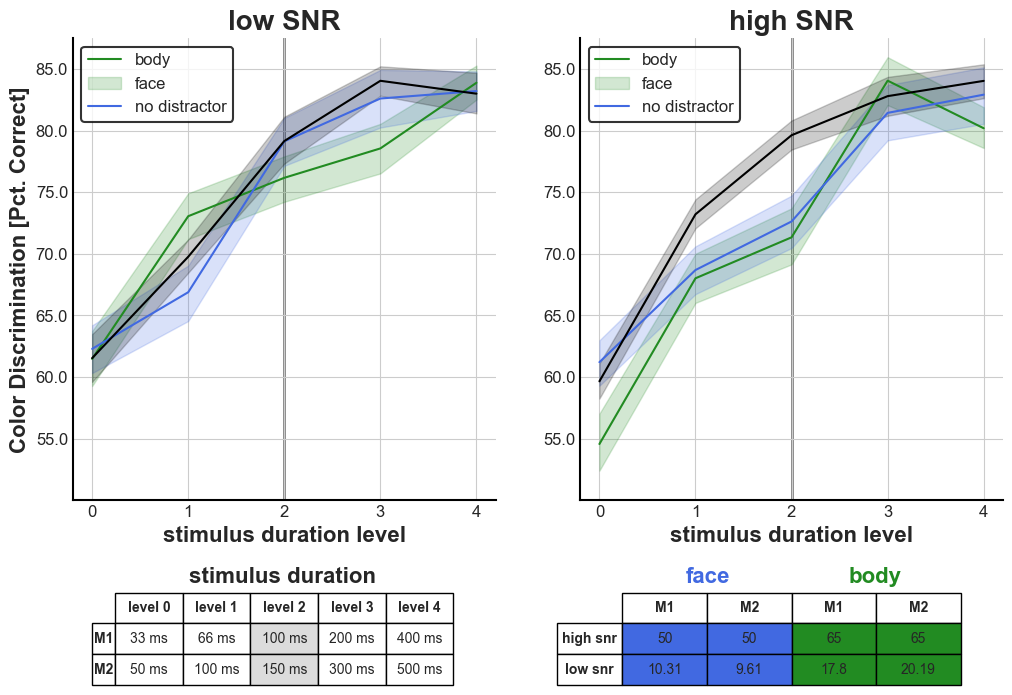

In [3]:


import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import clean_fig1
import plot_color_snr as pc_snr
import plot_fig1 as pf1
import stats_fig1 as sf1
import warnings
warnings.filterwarnings("ignore")

anova_dir = 'hbp-d000058_VTAinducedVPLandPlasticity_pub-v1.0-data_storage - behavior/behaviour_interference_test/high_vs_parathreshold/'
df_full = clean_fig1.make_df_full()
df_per_run_melt = df_full.groupby(['monkey_date_run', 'time_level', 'snr_level',
                                   'is_distractor', 'DistractorCategory'], as_index=False).Answer.mean()
df_per_run_melt_m2 = df_per_run_melt[df_per_run_melt.monkey_date_run.str.contains('m2')]
df_per_run_melt_m1 = df_per_run_melt[df_per_run_melt.monkey_date_run.str.contains('m1')]

# per time level
formula = 'Answer ~ DistractorCategory'
pval_per_time_level, fdr = sf1.compute_all_levels_time_stim_cat(
    df_per_run_melt[df_per_run_melt.snr_level == 'high_snr'], formula)

# group stats
lm_high_snr = smf.ols('Answer ~ time_level*DistractorCategory',
                      data=df_per_run_melt[df_per_run_melt.snr_level == 'high_snr']).fit()
aov_table_high_snr = sm.stats.anova_lm(lm_high_snr, typ=2)
pf1.plot_aov_table(aov_table_high_snr, os.path.join(anova_dir, 'fig1_group_highSNR_facebody_anova.pdf'))

lm_low_snr = smf.ols('Answer ~ time_level*DistractorCategory',
                     data=df_per_run_melt[df_per_run_melt.snr_level == 'low_snr']).fit()
aov_table_low_snr = sm.stats.anova_lm(lm_low_snr, typ=2)
pf1.plot_aov_table(aov_table_low_snr, os.path.join(anova_dir, 'fig1_group_lowSNR_facebody_anova.pdf'))

lm_high_snr = smf.ols('Answer ~ DistractorCategory',
                      data=df_per_run_melt[(df_per_run_melt.snr_level == 'high_snr') & (df_per_run_melt.time_level == 2)]).fit()
aov_table_high_snr = sm.stats.anova_lm(lm_high_snr, typ=2)
pf1.plot_aov_table(aov_table_high_snr, os.path.join(anova_dir, 'fig1_group_highSNR_facebody_anova_level2.pdf'))

lm_low_snr = smf.ols('Answer ~ DistractorCategory',
                     data=df_per_run_melt[(df_per_run_melt.snr_level == 'low_snr') & (df_per_run_melt.time_level == 2)]).fit()
aov_table_low_snr = sm.stats.anova_lm(lm_low_snr, typ=2)
pf1.plot_aov_table(aov_table_low_snr, os.path.join(anova_dir, 'fig1_group_lowSNR_facebody_anova_level2.pdf'))


# m2 stats
lm_high_snr = smf.ols('Answer ~ time_level*DistractorCategory',
                      data=df_per_run_melt_m2[df_per_run_melt_m2.snr_level == 'high_snr']).fit()
aov_table_high_snr = sm.stats.anova_lm(lm_high_snr, typ=2)
pf1.plot_aov_table(aov_table_high_snr, os.path.join(anova_dir, 'fig1_m2_highSNR_facebody_anova.pdf'))
lm_low_snr = smf.ols('Answer ~ time_level*DistractorCategory',
                     data=df_per_run_melt_m2[df_per_run_melt_m2.snr_level == 'low_snr']).fit()
aov_table_low_snr = sm.stats.anova_lm(lm_low_snr, typ=2)
pf1.plot_aov_table(aov_table_low_snr, os.path.join(anova_dir, 'fig1_m2_lowSNR_facebody_anova.pdf'))


# m1 stats
lm_high_snr = smf.ols('Answer ~ time_level*DistractorCategory',
                      data=df_per_run_melt_m1[df_per_run_melt_m1.snr_level == 'high_snr']).fit()
aov_table_high_snr = sm.stats.anova_lm(lm_high_snr, typ=2)
pf1.plot_aov_table(aov_table_high_snr, os.path.join(anova_dir, 'fig1_m1_highSNR_facebody_anova.pdf'))
lm_low_snr = smf.ols('Answer ~ time_level*DistractorCategory',
                     data=df_per_run_melt_m1[df_per_run_melt_m1.snr_level == 'low_snr']).fit()
aov_table_low_snr = sm.stats.anova_lm(lm_low_snr, typ=2)
pf1.plot_aov_table(aov_table_low_snr, os.path.join(anova_dir, 'fig1_m1_lowSNR_facebody_anova.pdf'))

current_palette = sns.color_palette(['forestgreen', 'royalblue', 'black'])
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.lineplot(x="time_level", y="Answer", hue="DistractorCategory", ci=68, palette=current_palette,
             data=df_per_run_melt[df_per_run_melt.snr_level == 'low_snr'], ax=ax[0])
sns.lineplot(x="time_level", y="Answer", hue="DistractorCategory", ci=68, palette=current_palette,
             data=df_per_run_melt[df_per_run_melt.snr_level == 'high_snr'], ax=ax[1])
ax[0].set_title('low SNR', fontsize=20, fontweight='bold')
ax[1].set_title('high SNR', fontsize=20, fontweight='bold')
legend_h = [0, 0]
frame_h = [0, 0]
for i in range(2):
    ax[i].axvline(x=2, color='gray', linewidth=2, zorder=-1)
    ax[i].set_xticks(np.arange(5))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_yticks(np.linspace(0.55, 0.90, 8))
    ax[i].set_yticklabels(np.linspace(55, 90, 8), fontsize=12)
    ax[i].set_xticks(np.linspace(0, 4, 5))
    ax[i].set_xticklabels(np.linspace(0, 4, 5, dtype=np.int), fontsize=12)
    ax[i].set_xlabel('stimulus duration level', fontsize=16, fontweight='bold')
    legend_h[i] = ax[i].legend(['body', 'face', 'no distractor'], frameon=True, fontsize=12, loc='upper left')
    frame_h[i] = legend_h[i].get_frame()
    frame_h[i].set_linewidth(1.5)
    frame_h[i].set_edgecolor('black')
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_linewidth(1.5)
    ax[i].spines['bottom'].set_color('black')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_linewidth(1.5)
    ax[i].spines['left'].set_color('black')
    ax[i].set_ylim(.50, .875)

ax[0].set_ylabel('Color Discrimination [Pct. Correct]', fontsize=16, fontweight='bold')
ax[0].text(0.275, -0.18, 'stimulus duration', fontsize=16, fontweight='bold', transform=ax[0].transAxes)
the_table_1 = pc_snr.print_table_duration(ax[0])
the_table_2 = pc_snr.print_table_snr(ax[1])
ax[1].text(1.45, -0.18, 'face', fontsize=16, fontweight='bold', color='royalblue', transform=ax[0].transAxes)
ax[1].text(1.835, -0.18, 'body', fontsize=16, fontweight='bold', color='forestgreen', transform=ax[0].transAxes)
filename = 'group_high_low_snr_facebody_test.pdf'
plt.show()
plt.close()


### Fig 2c

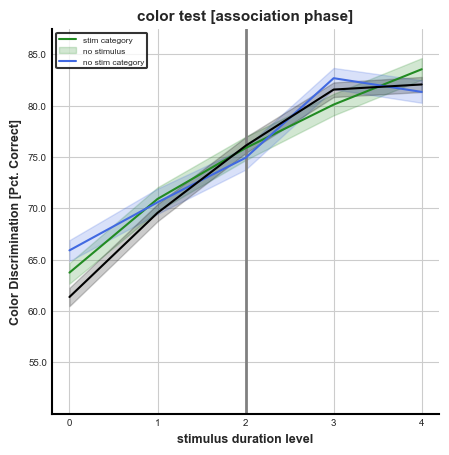

In [4]:
import os

import statsmodels.api as sm
import statsmodels.formula.api as smf

import clean_fig2d_color_test_fridays as clean
import plot_fig2d_color_test_fridays as pl_fri
import warnings
warnings.filterwarnings("ignore")

df_full = clean.make_df_full()
df_per_run_melt = df_full.groupby(['monkey_date_run', 'time_level', 'is_distractor', 'DistractorCategory'],
                                  as_index=False).Answer.mean()

df = {}
df['m2'] = df_per_run_melt[df_per_run_melt.monkey_date_run.str.contains('m2')]
df['m1'] = df_per_run_melt[df_per_run_melt.monkey_date_run.str.contains('m1')]

pl_fri.plot_main_figure(df_full)

lm = smf.ols('Answer ~ time_level*DistractorCategory', data=df_per_run_melt).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
pl_fri.plot_aov_table(aov_table, os.path.join(anova_dir, 'fig2d_group_time_distCategory.pdf'))

lm = smf.ols('Answer ~ time_level*DistractorCategory', data=df['m2']).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
pl_fri.plot_aov_table(aov_table, os.path.join(anova_dir, 'fig2d_m2_time_distCategory.pdf'))

lm = smf.ols('Answer ~ time_level*DistractorCategory', data=df['m1']).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
pl_fri.plot_aov_table(aov_table, os.path.join(anova_dir, 'fig2d_m1_time_distCategory.pdf'))


lm = smf.ols('Answer ~ DistractorCategory', data=df_per_run_melt[df_per_run_melt.time_level == 2]).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
pl_fri.plot_aov_table(aov_table, os.path.join(anova_dir, 'fig2d_group_time_distCategory_level2.pdf'))

lm = smf.ols('Answer ~ DistractorCategory', data=df['m2'][df['m2'].time_level == 2]).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
pl_fri.plot_aov_table(aov_table, os.path.join(anova_dir, 'fig2d_m2_time_distCategory_level2.pdf'))

lm = smf.ols('Answer ~ DistractorCategory', data=df['m1'][df['m1'].time_level == 2]).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
pl_fri.plot_aov_table(aov_table, os.path.join(anova_dir, 'fig2d_m1_time_distCategory_level2.pdf'))
plt.show()

### Fig 2d

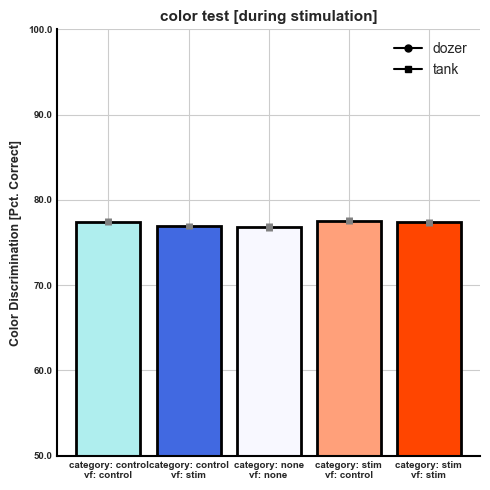

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import clean_fig2c_color_test_stim as clean
import plot_fig2c_color_test_stim as plot_fig2
import warnings
warnings.filterwarnings("ignore")

df_full = clean.make_fig2_color_test()
df_summarized = df_full.groupby(['monkey', 'date', 'Run', 'stim_category', 'stim_vf','vf'], as_index=False).Answer.mean()
df_summarized['stimcat_stimvf'] = df_summarized['stim_category'].astype(str) + 'CAT_' \
    + df_summarized['stim_vf'].astype(str)

lm = smf.ols('Answer ~ vf', data=df_summarized).fit()
aov_table = sm.stats.anova_lm(lm, typ=2)
plot_fig2.plot_aov_table(aov_table, 'group_anova_stim_pct_fix.pdf')

lm_m1 = smf.ols('Answer ~ vf', data=df_summarized[df_summarized.monkey == 'm1']).fit()
aov_table_m1 = sm.stats.anova_lm(lm_m1, typ=2)
plot_fig2.plot_aov_table(aov_table_m1, 'm1_anova_stim_pct_fix.pdf')

lm_m2 = smf.ols('Answer ~ vf', data=df_summarized[df_summarized.monkey == 'm2']).fit()
aov_table_m2 = sm.stats.anova_lm(lm_m2, typ=2)
plot_fig2.plot_aov_table(aov_table_m2, 'm2_anova_stim_pct_fix.pdf')

plot_fig2.plot_main_fig(df_summarized)